## Missing and spurious interactions and the reconstruction of complex networks

Eugenia Boccanera 2109310  
Lucrezia Rossi 

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt 
import networkx as nx

In [ ]:
# Function to create a simple network
def create_network():  
    G = nx.Graph()
    edges = [(0,1),(1,2), (2,3), (3,0), (1,3)] # Define the edges
    G.add_edges_from(edges) # Add the edges to the network
    return G



# Function to modify the network (remove or add a link)   COPILOT
def alterate_network(G):
    # Choose a random edge
    edges = list(G.edges())
    edge = random.choice(edges)
    # Remove the edge
    G.remove_edge(edge[0], edge[1])
    # Add a new edge
    new_edge = (random.choice(list(G.nodes())), random.choice(list(G.nodes())))
    G.add_edge(new_edge[0], new_edge[1])

In [17]:
# Function to modify the network (remove or add a link)   CHAT GPT 
def alterate_network(G, frac=0.3):
    G_obs = G.copy()
    edges = list(G.edges)
    non_edges = list(nx.non_edges(G))

    # Rimuoviamo una frazione dei collegamenti veri
    num_remove = int(len(edges) * frac)
    removed_edges = random.sample(edges, num_remove)
    G_obs.remove_edges_from(removed_edges)

    # Aggiungiamo nuovi collegamenti casuali
    num_add = num_remove  # Stesso numero di rimozioni
    added_edges = random.sample(non_edges, num_add)
    G_obs.add_edges_from(added_edges)

    return G_obs, removed_edges, added_edges

La reliability (affidabilità) di un collegamento in una rete misura quanto è probabile che un determinato link esista davvero data la rete osservata. L'idea è che i dati sperimentali sulle reti possono contenere errori, quindi vogliamo stimare se un collegamento è affidabile o se potrebbe essere spurio (falso positivo) o mancante (falso negativo).  

Nel codice che ti ho fornito, la reliability di un collegamento (i,j)(i,j) è approssimata usando il numero di vicini comuni tra i nodi ii e jj.
Più nodi condividono connessi sia a ii che a jj, più è probabile che ii e jj siano effettivamente connessi.

Formula usata:
Reliability(i,j)=Numero di vicini comuni tra i e j


GUARDO SE QUESTA FORMULA VA BENE, CONTROLLO PAPER  

Nell’articolo di Guimerà e Sales-Pardo, invece di usare solo i vicini comuni, viene utilizzato un modello probabilistico basato su Metropolis-Hastings, che stima la vera reliability di un link considerando l’intera struttura della rete e un modello a blocchi stocastici.

In [18]:
# Compute reliability of the network
def compute_reliability(G, edges):
    scores= {}
    for u, v in edges:
        common_neighbors = len(list(nx.common_neighbors(G, u, v)))
        scores[(u,v)] = common_neighbors
    return scores


In [24]:
# Plot the network
def plot_network (G, title, removed_edges=[], added_edges=[]):
    plt.figure(figsize=(5,5))
    pos= nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color= 'gray', node_size= 800, font_size=12, font_weight="bold", font_color="black")

    # Underline the changes
    nx.draw_networkx_edges(G, pos, edgelist=removed_edges, edge_color="red", width=2, style= 'dashed', label = 'Removed edges')
    nx.draw_networkx_edges(G, pos, edgelist=added_edges, edge_color="green", width=2, label= 'Added edges')
    plt.legend()

    plt.title(title)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


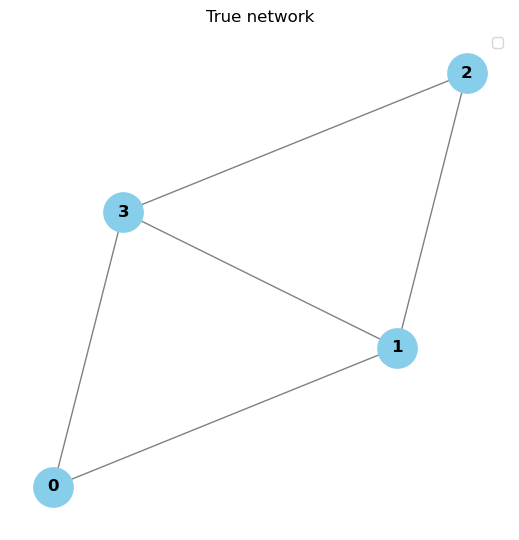

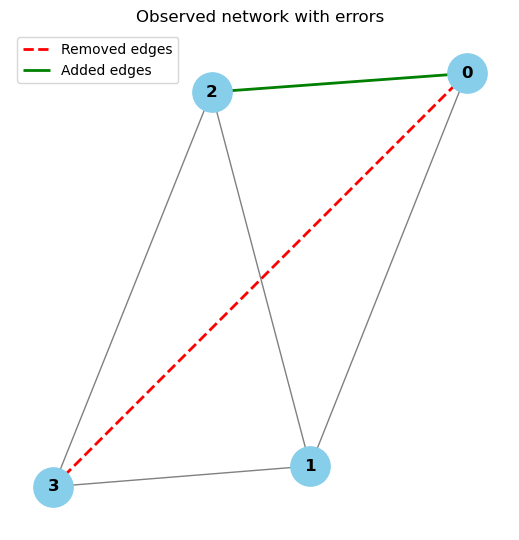

Reliability of the network:
Edge (1, 2): 2 common neighbors
Edge (0, 1): 1 common neighbors
Edge (0, 2): 1 common neighbors
Edge (1, 3): 1 common neighbors
Edge (2, 3): 1 common neighbors


In [ ]:
G_true = create_network()
G_observed, removed_edges, added_edges= alterate_network(G_true, frac=0.3)

# Compute the reliability of the network
reliability = compute_reliability(G_observed, list(nx.edges(G_observed)))

# Plots
plot_network(G_true, "True network")
plot_network(G_observed, "Observed network with errors", removed_edges, added_edges)

print("Reliability of the network:")
for edge, score in sorted(reliability.items(), key= lambda x: x[1], reverse=True):
    print(f"Edge {edge}: {score} common neighbors")

4️⃣ Prossimi passi

🔹 Implementare Metropolis-Hastings per stimare la vera probabilità di un link, invece dei vicini comuni.    
    Riprodurre le curve della FIg.2  nel paper   
🔹 Estendere il codice a reti più grandi.  
🔹 Confrontare il metodo con altre tecniche (es. algoritmo di Clauset et al.)

Nell’articolo di Guimerà e Sales-Pardo, invece di usare solo i vicini comuni per calcolare la reliability, viene utilizzato un modello probabilistico basato su Metropolis-Hastings, che stima la vera reliability di un link considerando l’intera struttura della rete e un modello a blocchi stocastici.